In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt

import folium
from folium import Circle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 97.0/97.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 133.2/133.2 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 56.3/56.3 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Load the dataset

In [6]:
power_df = pd.read_csv('powerplants.csv')
power_df.head()

country code country_long                                name of powerplant  \
0          AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1          AFG  Afghanistan                                      Kandahar DOG   
2          AFG  Afghanistan                                      Kandahar JOL   
3          AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4          AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

   capacity in MW  latitude  longitude primary_fuel secondary fuel  \
0            33.0    32.322    65.1190        Hydro            NaN   
1            10.0    31.670    65.7950        Solar            NaN   
2            10.0    31.623    65.7920        Solar            NaN   
3            66.0    34.556    69.4787        Hydro            NaN   
4           100.0    34.641    69.7170        Hydro            NaN   

  other_fuel2 other_fuel3  start date owner of plant  generation_gwh_2021  \
0         NaN         NaN         NaN            NaN                  NaN   
1         NaN         NaN         NaN            NaN                  NaN   
2         NaN         NaN         NaN            NaN                  NaN   
3         NaN         NaN         NaN            NaN                  NaN   
4         NaN         NaN         NaN            NaN                  NaN   

  geolocation_source  estimated_generation_gwh_2021  
0              GEODB                         123.77  
1         Wiki-Solar                          18.43  
2         Wiki-Solar                          18.64  
3              GEODB                         225.06  
4              GEODB                         406.16

### Which countries have the most power plants?

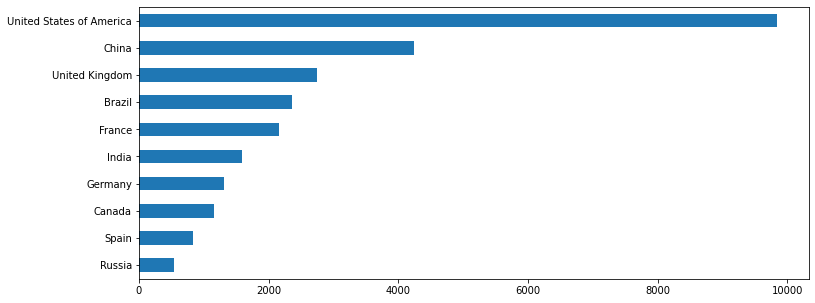

In [3]:
power_df['country'].value_counts().head(10).sort_values().plot.barh(figsize=(12, 5));

In [4]:
power_df['country'].value_counts()

United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
                            ... 
Lesotho                        1
Western Sahara                 1
Suriname                       1
Palestine                      1
Guinea-Bissau                  1
Name: country, Length: 167, dtype: int64

### Get all power plants in the United States

In [5]:
usa_power = power_df[power_df['country'] == 'United States of America']
usa_power.describe()

capacity in MW     latitude    longitude   start date  \
count     9833.000000  9833.000000  9833.000000  9810.000000   
mean       122.509717    39.007787   -94.094021  1998.250583   
std        345.781348     5.665173    19.838359    24.524669   
min          1.000000    13.303500  -171.712400  1896.000000   
25%          2.600000    35.200200  -111.078100  1988.000000   
50%          8.200000    39.637000   -90.912000  2009.000000   
75%         65.000000    42.529200   -78.132300  2016.000000   
max       6809.000000    71.292000   144.899900  2020.000000   

       generation_gwh_2020  estimated_generation_gwh_2020  
count          9659.000000                    9531.000000  
mean            423.922436                     488.213749  
std            1698.506485                    1726.026804  
min            -780.339000                       0.180000  
25%               2.751500                       3.800000  
50%              11.530000                      13.450000  
75%             122.781498                     175.970000  
max           31920.368000                   33395.960000

In [6]:
usa_power.describe(include = ['O'])

country code                   country name of powerplant primary_fuel  \
count          9833                      9833               9833         9833   
unique            1                         1               9817           14   
top             USA  United States of America       Quincy Solar        Solar   
freq           9833                      9833                  2         3283   

       secondary fuel other_fuel 1 other_fuel 2            owner of plant  \
count            1429          269           92                      9818   
unique             12           11            8                      4595   
top               Oil          Gas          Gas  Cypress Creek Renewables   
freq              778           99           31                       185   

                            geolocation_source  \
count                                     9833   
unique                                       3   
top     U.S. Energy Information Administration   
freq                                      9789   

                        generation_data_source  
count                                     9715  
unique                                       1  
top     U.S. Energy Information Administration  
freq                                      9715

### Map the plants by primary fuel type

In [7]:
# Create a base map
us_map = folium.Map(location=[37,-96], tiles='cartodbpositron', zoom_start=4)

color_map = {'Solar': 'yellow',
             'Gas': 'orange',
             'Hydro': 'aqua',
             'Wind': 'green',
             'Oil': 'gray',
             'Waste': 'brown',
             'Coal': 'black',
             'Nuclear': 'red'}

# Add circles to the map in each Subway store location
for idx, row in usa_power.iterrows():
    Circle(location=[row['latitude'], row['longitude']],
           radius=25,
           color=color_map.get(row['primary_fuel'], 'blue')
          ).add_to(us_map)

# Display the map
us_map